In [1]:
import MCTS
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
from board_gen import *
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
stratL = ['loose_end','join','outer','middle']
n_runs=10
n_tasks=8
max_iters=500
niter=np.zeros((len(stratL),n_runs,n_tasks,2))

In [3]:
for strat_id,strat_name in enumerate(stratL):
    for run_id in range(n_runs):
        taskL = []#[generate_board(tactic_name=strat_name,n_extra_sticks=0,contiguous=True) for i in range(1)]
        taskL+=[generate_board(tactic_name=strat_name,n_extra_sticks=2,contiguous=True) for i in range(n_tasks)]
        for use_mem in [0,1]:
            memory=[]
            for task_id,task in enumerate(taskL):
                hn=task.head_node
                t2=MCTS.MCTSTask(hn.obs,task.nsquares,hn.moves_remain,memory=memory)
                n_iters=MCTS.MCTS(t2,max_iters=max_iters)
                if n_iters==-99:
                    n_iters=max_iters
                if use_mem==1:
                    MCTS.update_memory(t2,memory,gamma=1)
                niter[strat_id,run_id,task_id,use_mem]=n_iters
            print(strat_name,use_mem,niter[strat_id,run_id,:,use_mem])

loose_end 0 [ 87. 103.  36.  35.  90. 105. 101.  62.]
loose_end 1 [61. 78.  1. 45. 37.  1.  1.  1.]
loose_end 0 [36. 59. 44. 87. 66. 81. 81. 90.]
loose_end 1 [81. 36. 48.  1.  1.  1.  1. 30.]
loose_end 0 [ 85.  33.  49.  68. 110.  95.  79.  78.]
loose_end 1 [54. 32.  1.  1.  1.  1.  1.  1.]
loose_end 0 [ 62.  97.  79.  70.  58. 123.  42.  29.]
loose_end 1 [102.  61.  99.  83.  70.  51.   1. 140.]
loose_end 0 [54. 52. 91. 79. 93. 42. 55. 75.]
loose_end 1 [59. 71. 89. 62. 38. 78. 78.  1.]
loose_end 0 [41. 58. 61. 40. 40. 58. 75. 89.]
loose_end 1 [ 70.   1. 108.  82.   1.  41.  69. 131.]
loose_end 0 [ 30.  97.  50.  37.  39.  48. 114.  52.]
loose_end 1 [52. 78. 80.  1.  1. 80.  1.  1.]
loose_end 0 [ 66.  37.  38. 137.  65.  60.  90.  37.]
loose_end 1 [39. 72. 29.  1.  1.  1.  1.  1.]
loose_end 0 [ 60.  62. 102.  52. 111.  88.  57.  83.]
loose_end 1 [127.  44.  41.  88.  32. 114.   1.  54.]
loose_end 0 [113.  54. 107.  58.  84.  36. 117.  34.]
loose_end 1 [126.  76.  56.  30. 107.   1.   1

In [4]:
means=np.mean(niter,1)

In [5]:
t2=MCTS.MCTSTask(hn.obs,task.nsquares,hn.moves_remain,memory=memory)
n_iters=MCTS.MCTS(t2,max_iters=max_iters)


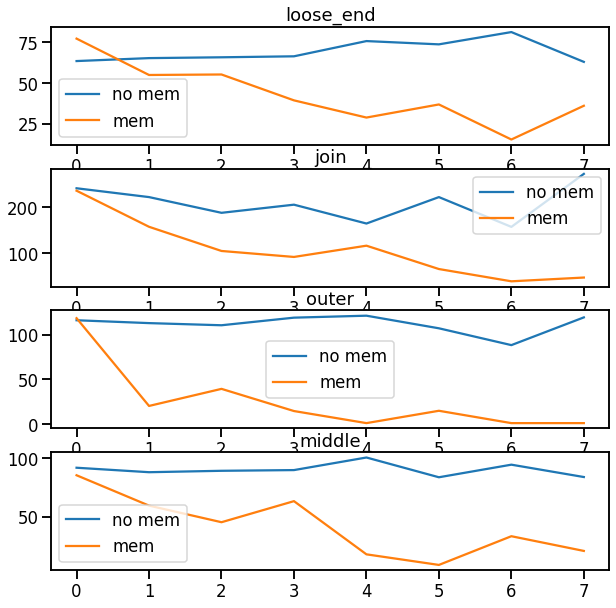

In [7]:
plt.figure(figsize=(10,10))
for strat_id,strat_name in enumerate(stratL):
    plt.subplot(4,1,strat_id+1)
    for use_mem in [0,1]:
        plt.plot(means[strat_id,:,use_mem],label=['no mem','mem'][use_mem])
        plt.legend()
    plt.title(strat_name)
    #plt.ylim(0,10)